# 第５章

In [ ]:
import sys
import pprint
sys.path.append('/opt/conda/envs/myenv/lib/python3.7/site-packages')
pprint.pprint(sys.path)

In [ ]:
!cabocha -f1 ai.ja.txt -o ai.ja.txt.parsed 

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

|人工知能|名詞|固有名詞|一般|*|*|*|人工知能|ジンコウチノウ|ジンコーチノー|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|表層形|品詞|品詞細分類1|品詞細分類2|品詞細分類3|活用形|原型|活用形|原型|読み|発音|

In [2]:
class Morph:
      def __init__(self, morph):
            surface, fields = morph.split('\t')
            field = fields.split(',')
            self.surface = surface
            self.base = field[6]
            self.pos = field[0]
            self.pos1 = field[1]

In [3]:
sentences = []
morphs = []
with open('./ai.ja.txt.parsed', mode='r') as f:
    for line in f:
        # 係り受け関係を表す行
        if line[0] == '*': 
            continue
        # 形態素をMorphクラスに変換
        elif line != 'EOS\n':
            morphs.append(Morph(line))
        # 形態素以外の行になったとき、これまでのMorphクラスリストを追加する。
        elif len(morphs)>0:
            sentences.append(morphs)    
            morphs = []
for sentence in sentences[1][:10]:
    print(vars(sentence))

{'surface': '人工知能', 'base': '人工知能', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '（', 'base': '（', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'じん', 'base': 'じん', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'こうち', 'base': 'こうち', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'のう', 'base': 'のう', 'pos': '助詞', 'pos1': '終助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'AI', 'base': 'AI', 'pos': '名詞', 'pos1': '固有名詞'}
{'surface': '〈', 'base': '〈', 'pos': '記号', 'pos1': '括弧開'}
{'surface': 'エーアイ', 'base': 'A.I.', 'pos': '名詞', 'pos1': '固有名詞'}


## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．



|*|0|14D|0/0|0.011347|
|:--:|:--:|:--:|:--:|:--:|
|文節の開始位置|文節番号|係り先の文節番号|主辞/機能語|係りやすさの度合|

In [3]:
class Chunk():
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst = dst
        self.srcs = []

# Chunkクラスリストをもつ1文を表すクラス
# Chunkクラスのsrcsを整える
class Sentence():
    def __init__(self, chunks):
        self.chunks = chunks
        for idx, chunk in enumerate(self.chunks):
            if chunk.dst != -1:
                self.chunks[chunk.dst].srcs.append(idx)

In [93]:
sentences = []
chunks = []
morphs = []
with open('./ai.ja.txt.parsed', mode='r') as f:
    for line in f:
        if line[0] == '*': # 係り受け関係を表す行
            if len(morphs)>0: # その前に文節があればChunkクラスに追加
                chunks.append(Chunk(morphs, dst))
                morphs = []
            dst = int(line.split(' ')[2].replace('D', '')) # 係り先の文節番号
        elif line != 'EOS\n':
            morphs.append(Morph(line))
        # 文章が終わったらSentenceクラスに追加
        elif len(morphs)>0:
            chunks.append(Chunk(morphs, dst))
            sentences.append(Sentence(chunks))
            chunks = []
            morphs = []

for sentence in sentences[:2]:
    print()
    for chunk in sentence.chunks:
        print([morph.surface for morph in chunk.morphs], 'dst:',chunk.dst, 'srcs:',chunk.srcs)


['人工知能'] dst: -1 srcs: []

['人工知能'] dst: 14 srcs: []
['（', 'じん', 'こうち', 'のう', '、', '、'] dst: 14 srcs: []
['AI'] dst: 3 srcs: []
['〈', 'エーアイ', '〉', '）', 'と', 'は', '、'] dst: 14 srcs: [2]
['「', '『', '計算', '（）', '』', 'という'] dst: 6 srcs: []
['概念', 'と'] dst: 6 srcs: []
['『', 'コンピュータ', '（）', '』', 'という'] dst: 7 srcs: [4, 5]
['道具', 'を'] dst: 8 srcs: [6]
['用い', 'て'] dst: 10 srcs: [7]
['『', '知能', '』', 'を'] dst: 10 srcs: []
['研究', 'する'] dst: 11 srcs: [8, 9]
['計算機科学', '（）', 'の'] dst: 12 srcs: [10]
['一', '分野', '」', 'を'] dst: 13 srcs: [11]
['指す'] dst: 14 srcs: [12]
['語', '。'] dst: 30 srcs: [0, 1, 3, 13]
['「', '言語', 'の'] dst: 17 srcs: []
['理解', 'や'] dst: 17 srcs: []
['推論', '、'] dst: 19 srcs: [15, 16]
['問題解決', 'など', 'の'] dst: 19 srcs: []
['知的', '行動', 'を'] dst: 21 srcs: [17, 18]
['人間', 'に'] dst: 21 srcs: []
['代わっ', 'て'] dst: 23 srcs: [19, 20]
['コンピューター', 'に'] dst: 23 srcs: []
['行わ', 'せる'] dst: 24 srcs: [21, 22]
['技術', '」', '、', 'または', '、'] dst: 30 srcs: [23]
['「', '計算機', '（', 'コンピュータ', '）', 'による'] dst:

## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [141]:
# 文節から文章を復元する関数
# 引数
# chunk: Chunkクラス
# mode: surface=元の文章を返す, pos=品詞一覧を返す, search=品詞の条件にあてはまるmorph.baseを返す
def Chunk_decomp(chunk, mode='surface',pos=''):
    if mode == 'surface':
        return ''.join([morph.surface for morph in chunk.morphs if morph.pos!='記号'])
    elif mode == 'pos':
        return ''.join([morph.pos for morph in chunk.morphs])
    elif mode == 'search':
        return [morph.base for morph in chunk.morphs if morph.pos==pos]

In [142]:
with open('ans42.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            src = Chunk_decomp(chunk) # 元の文節
            dst = Chunk_decomp(sentence.chunks[chunk.dst]) # 係り先の文節
            print(f"{src}\t{dst}", file=f)
!head -n 10 ans42.txt

人工知能	人工知能
人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算（）という	コンピュータ（）という
概念と	コンピュータ（）という
コンピュータ（）という	道具を
道具を	用いて
用いて	研究する


## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [138]:
with open('ans43.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            if '名詞' in Chunk_decomp(chunk,mode='pos') and '動詞' in Chunk_decomp(sentence.chunks[chunk.dst], mode='pos'):
                noun = Chunk_decomp(chunk) # 元の文節
                verb = Chunk_decomp(sentence.chunks[chunk.dst]) # 係り先の文節
                print(f"{noun}\t{verb}", file=f)
!head -n 10 ans43.txt            

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
解説で	述べている
佐藤理史は	述べている
次のように	述べている


## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

Digraph: 有向グラフ
Graph: 無向グラフ

g.node('0', shape='circle'):　ノード単体の表示
g.edge(strA, strB, label=edge_name): 辺の表示



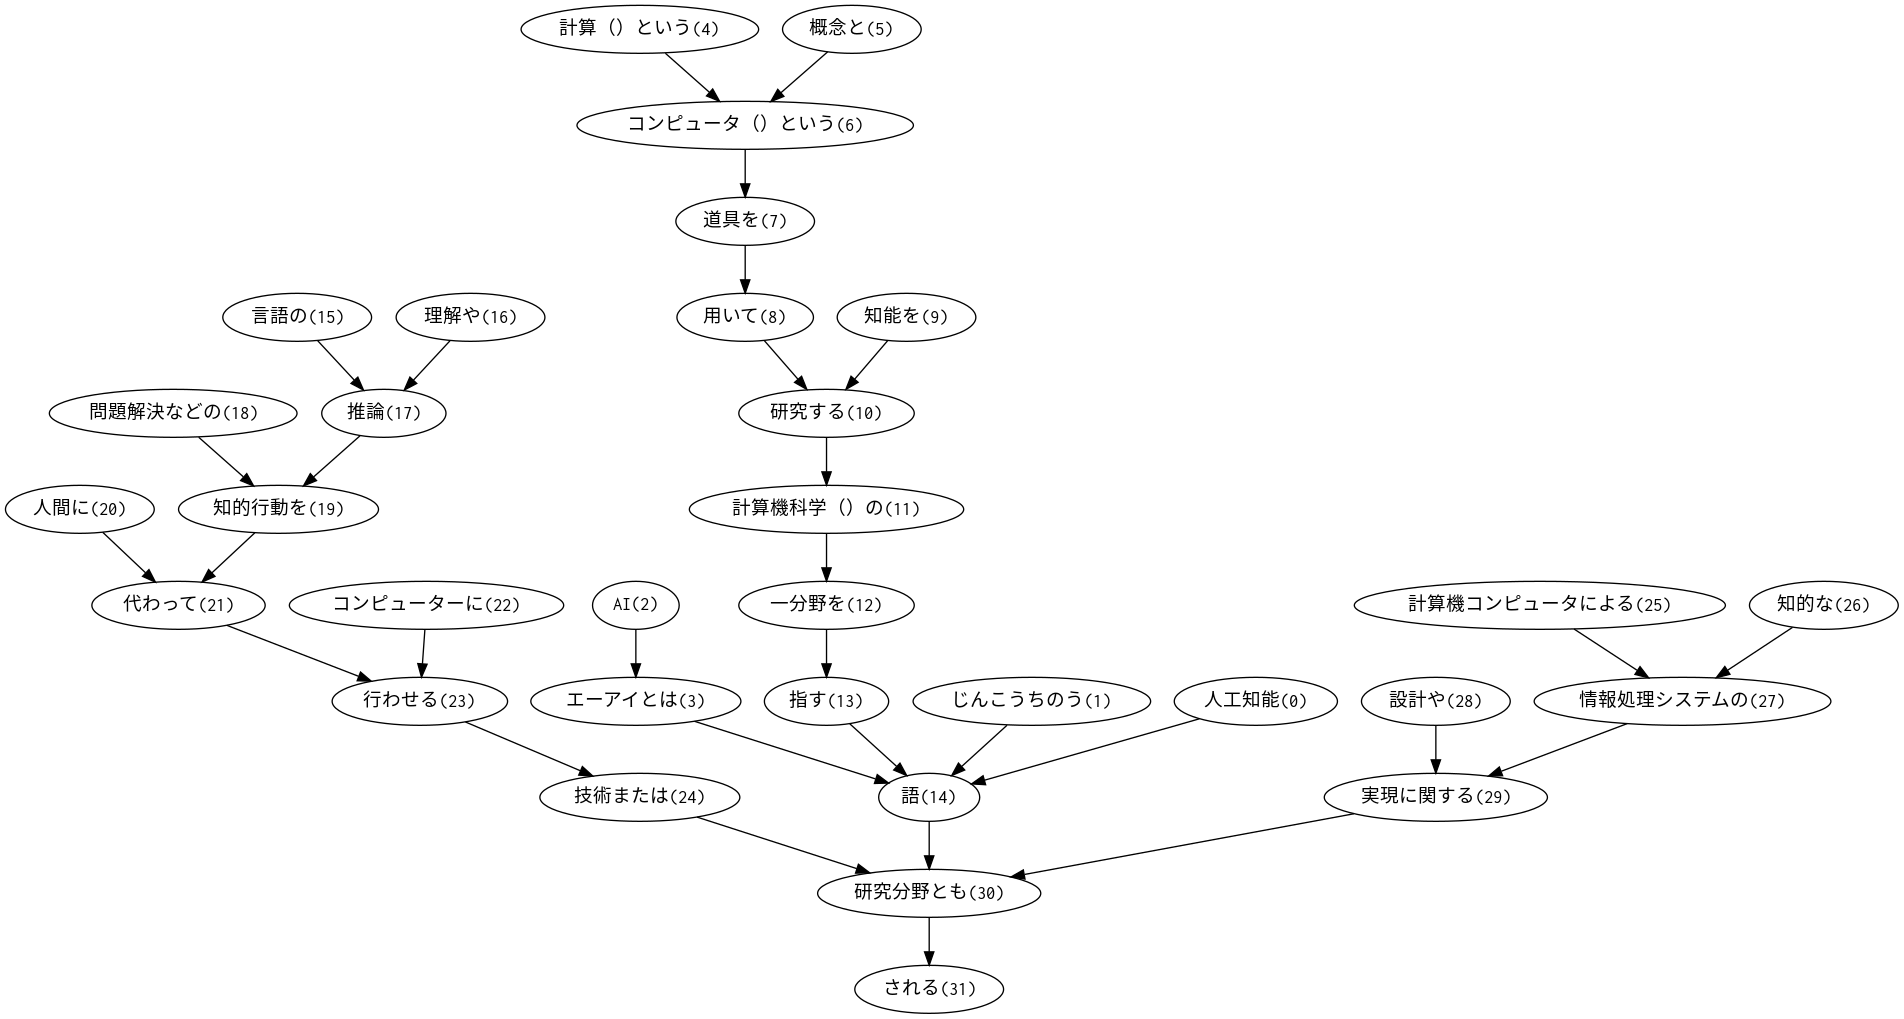

In [139]:
import pydot
from IPython.display import Image,display_png
from graphviz import Digraph

sentence = sentences[1]
edges = []
for idx, chunk in enumerate(sentence.chunks):
      if chunk.dst != -1:
            src_node = Chunk_decomp(chunk)+f'({idx})'
            dst_node = Chunk_decomp(sentence.chunks[chunk.dst])+f'({chunk.dst})'
            edges.append([src_node, dst_node])

g = pydot.graph_from_edges(edges, directed=True)
g.write_png('ans.png')
display_png(Image('ans.png'))

## 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．
* 動詞を含む文節において，最左の動詞の基本形を述語とする
* 述語に係る助詞を格とする
* 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

```
作り出す	で は を
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

コーパス中で頻出する述語と格パターンの組み合わせ
「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [143]:
text = ""
for sentence in sentences:
    for chunk in sentence.chunks:
        verbs = Chunk_decomp(chunk, mode='search', pos='動詞')# 動詞一覧
        if len(verbs)>0:
            verb = verbs[0] # 動詞を含む文節において，最左の動詞の基本形を述語とする
            cases = []
            for case_id in chunk.srcs: # 動詞にかかっている文節の助詞
                cases += Chunk_decomp(sentence.chunks[case_id], mode='search', pos='助詞')
            text += f"{verb}\t{' '.join(sorted(cases))}\n" # 動詞\t助詞リストを作成

In [144]:
!cat ans45.txt | grep '行う' | sort | uniq -c | sort -nr | head -n 5

      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	は を
      1 行う	に を を


In [145]:
!cat ans45.txt | grep 'なる' | sort | uniq -c | sort -nr | head -n 5

      3 なる	に は
      3 なる	が と
      2 なる	に
      2 なる	と
      1 異なる	も


In [146]:
!cat ans45.txt | grep '与える' | sort | uniq -c | sort -nr | head -n 5

      1 与える	に は を
      1 与える	が に
      1 与える	が など に


## 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

```
作り出す	で は を	会議で ジョンマッカーシーは 用語を
```

In [147]:
text = ""
for sentence in sentences:
    for chunk in sentence.chunks:
        verbs = Chunk_decomp(chunk, mode='search', pos='動詞')
        if len(verbs)>0:
            verb = verbs[0] # 動詞を含む文節において，最左の動詞の基本形を述語とする
            cases = [] # 助詞リスト
            for case_id in chunk.srcs: # 動詞にかかっている文節の助詞
                original = Chunk_decomp(sentence.chunks[case_id]) # 助詞を含む文節
                cases += [[morph.base, original] for morph in sentence.chunks[case_id].morphs if morph.pos=='助詞'] # [助詞, 文節] の２次元リスト
            sortl = sorted(cases) # 助詞でソート
            text += f"{verb}\t{' '.join([x[0] for x in sortl])}\t{' '.join([x[1] for x in sortl])}\n" # 動詞\t助詞リストを作成
with open('ans46.txt', 'w') as f:
    f.write(text)

In [148]:
!cat ans46.txt | head -n 10

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに
する	と も	研究分野とも 研究分野とも
述べる	で に の は	解説で 次のように 次のように 佐藤理史は
する	で を	コンピュータ上で 知的能力を
する	を	推論判断を
する	を	画像データを


## 47. 機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

* 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
* 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
* 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
* 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．
```
学習を行う	に を	元に 経験を
```

In [151]:
text = ""
for sentence in sentences:
    for c_id, chunk in enumerate(sentence.chunks):
        for m_dx, morph in enumerate(chunk.morphs[:-1]):
            if morph.pos1 == 'サ変接続' and chunk.morphs[m_dx+1].surface == 'を': # 「サ変接続名詞+を」
                text += f"{morph.surface}を"
                phrase = sentence.chunks[chunk.dst] # 文節
                verbs = Chunk_decomp(phrase, mode='search', pos='動詞')# 「サ変接続名詞+を」の係り先の文節中に含まれる動詞

                if len(verbs)>0:
                    verb = verbs[0] # 文節中に複数の動詞があるときは、最左の動詞を用いる
                    cases = [] # 助詞リスト
                    
                    # 動詞を含む文節に係る文節
                    for case_id in phrase.srcs:
                        if case_id == c_id: # 上記の「サ変接続名詞+を」はスキップ
                            continue  
                        original = Chunk_decomp(sentence.chunks[case_id]) # 助詞を含む文節
                        cases += [[morph.base, original] for morph in sentence.chunks[case_id].morphs if morph.pos=='助詞'] # [助詞, 文節] の２次元リスト
                    # 文節をまとめる
                    sortl = sorted(cases) # 助詞でソート
                    text += f"{verb}\t{' '.join([x[0] for x in sortl])}\t{' '.join([x[1] for x in sortl])}\n" # 動詞\t助詞リストを作成
with open('ans47.txt', 'w') as f:
    f.write(text)

In [152]:
!cat ans47.txt | head -n 10

行動を代わる	に	人間に
判断をする		
処理を用いる		
記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
経験を行う	に を	元に 学習を
学習を行う	に を	元に 経験を
流行を超える		
学習を繰り返す		
学習をする	て で に は を を通して	なされている ACTRでは 元に ACTRでは 推論ルールを 生成規則を通して


## 48. 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．
```
ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した
```

In [153]:
with open('ans48.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence.chunks:
            text = ""
            if len(Chunk_decomp(chunk, mode='search', pos='名詞')) > 0:

                text += Chunk_decomp(chunk)
                dst = chunk.dst
                # 構文義の根に至るまでループ
                while dst != -1:
                    text += ' -> '
                    chunk = sentence.chunks[dst]
                    text += Chunk_decomp(chunk)
                    dst = chunk.dst
                print(text, file=f)
!head -n 10 ans48.txt

人工知能
人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算（）という -> コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学（）の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される


## 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
文節iとjに含まれる名詞句はそれぞれ，XとYに置換する
また，係り受けパスの形状は，以下の2通りが考えられる．

文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

```
Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
```

In [154]:
# 48の文節ID verを作成
Doc = []
for sentence in sentences:
    sequence = [] # 係り受けパス
    for idx, chunk in enumerate(sentence.chunks):
        text = []
        if len(Chunk_decomp(chunk, mode='search', pos='名詞')) > 0:
            text.append(idx)
            dst = chunk.dst
            # 構文義の根に至るまでループ
            while dst != -1:
                text.append(dst)
                dst = sentence.chunks[dst].dst
            sequence.append(text)
    Doc.append(sequence)

In [164]:
Doc[1]

[[0, 14, 30, 31],
 [1, 14, 30, 31],
 [2, 3, 14, 30, 31],
 [3, 14, 30, 31],
 [4, 6, 7, 8, 10, 11, 12, 13, 14, 30, 31],
 [5, 6, 7, 8, 10, 11, 12, 13, 14, 30, 31],
 [6, 7, 8, 10, 11, 12, 13, 14, 30, 31],
 [7, 8, 10, 11, 12, 13, 14, 30, 31],
 [9, 10, 11, 12, 13, 14, 30, 31],
 [10, 11, 12, 13, 14, 30, 31],
 [11, 12, 13, 14, 30, 31],
 [12, 13, 14, 30, 31],
 [14, 30, 31],
 [15, 17, 19, 21, 23, 24, 30, 31],
 [16, 17, 19, 21, 23, 24, 30, 31],
 [17, 19, 21, 23, 24, 30, 31],
 [18, 19, 21, 23, 24, 30, 31],
 [19, 21, 23, 24, 30, 31],
 [20, 21, 23, 24, 30, 31],
 [22, 23, 24, 30, 31],
 [24, 30, 31],
 [25, 27, 29, 30, 31],
 [26, 27, 29, 30, 31],
 [27, 29, 30, 31],
 [28, 29, 30, 31],
 [29, 30, 31],
 [30, 31]]

In [169]:
# 経路の探索 & 表示
import re
with open('ans49.txt', 'w') as f:
    for s_id, sentence in enumerate(sentences):
        # 文章ごとに処理
        sequences = Doc[s_id] # s_id番目の文章で生成される係り受けパス一覧
        noun_ids = [n[0] for n in sequences] # 名詞を含む文節のID一覧

        # ２つの名詞を含む文節の経路を見つける
        for x in noun_ids:
            Xpath = [p for p in sequences if p[0]==x][0] # 名詞句Xから根までのパス
            for y in noun_ids[1:]:
                Ypath = [p for p in sequences if p[0]==y][0] # 名詞句Yから根までのパス
                for i in Xpath:
                    if i in Ypath:
                        X_to_Y = i # XとYの折り返しポイントとなる文節ID
                        break

                # 経路の表示
                # Xから根に至る経路上にYがある場合
                X = re.sub(r'X{1,}', 'X', ''.join(['X' if s.pos=='名詞' else s.surface for s in sentence.chunks[x].morphs]))
                Y = re.sub(r'Y{1,}', 'Y', ''.join(['Y' if s.pos=='名詞' else s.surface for s in sentence.chunks[y].morphs]))
                if X_to_Y == y:
                    path = ' -> '.join([Chunk_decomp(sentence.chunks[p]) for p in Xpath[1:-1] if p <= X_to_Y])
                    print(f'{X} -> {path} -> {Y}' ,file=f)
                # X_to_Yで折り返す場合
                else:
                    src = ' -> '.join([Chunk_decomp(sentence.chunks[p]) for p in Xpath[1:-1] if p < X_to_Y])
                    dst = ' -> '.join([Chunk_decomp(sentence.chunks[p]) for p in Ypath[1:-1] if p < X_to_Y])
                    if src != '':
                        src = ' -> ' + src
                    if dst != '':
                        dst = ' -> ' + dst
                    halfway = Chunk_decomp(sentence.chunks[X_to_Y])
                    print(f'{X}{src} | {Y}{dst} | {halfway}' ,file=f)


In [170]:
!head -n 20 ans49.txt

X | （Yのう、、 | 語
X | Y -> エーアイとは | 語
X | 〈Y〉）とは、 | 語
X | 「『Y』という -> コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す | 語
X | Yと -> コンピュータ（）という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す | 語
X | 『Y』という -> 道具を -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す | 語
X | Yを -> 用いて -> 研究する -> 計算機科学（）の -> 一分野を -> 指す | 語
X | 『Y』を -> 研究する -> 計算機科学（）の -> 一分野を -> 指す | 語
X | Yする -> 計算機科学（）の -> 一分野を -> 指す | 語
X | Yの -> 一分野を -> 指す | 語
X | Y」を -> 指す | 語
X -> 語 -> Y。
X -> 語 | 「Yの -> 推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yや -> 推論 -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Y、 -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yなどの -> 知的行動を -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yを -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 代わって -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Yに -> 行わせる -> 技術または | 研究分野とも
X -> 語 | Y」、または、 | 研究分野とも
